In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

data_frame = pd.read_excel('2018-spring-match-data-OraclesElixir-2018-05-20.xlsx')

In [2]:
msi = data_frame.query('league == "MSI"')
msi.to_excel('msi.xlsx', index = False)

In [3]:
game = msi.query('url == "https://matchhistory.na.leagueoflegends.com/en/#match-details/TRLH3/1002520510?gameHash=9c810841e86a3126&tab=overview"')
game = game.drop(['url','gameid','date','split','league','week','side','playerid','patchno','game'], axis = 1)
game

,position,player,team,champion,ban1,ban2,ban3,ban4,ban5,gamelength,...,gdat15,xpat10,oppxpat10,xpdat10,csat10,oppcsat10,csdat10,csat15,oppcsat15,csdat15
15756,Top,Bwipo,Fnatic,Gangplank,Malzahar,Kai'Sa,Morgana,Ornn,Skarner,35.316667,...,653.0,4275.0,3352.0,923.0,70.0,41.0,29.0,115.0,90.0,25.0
15757,Jungle,Broxah,Fnatic,Trundle,Malzahar,Kai'Sa,Morgana,Ornn,Skarner,35.316667,...,372.0,3456.0,3622.0,-166.0,55.0,54.0,1.0,79.0,81.0,-2.0
15758,Middle,Caps,Fnatic,Taliyah,Malzahar,Kai'Sa,Morgana,Ornn,Skarner,35.316667,...,1200.0,4841.0,4559.0,282.0,87.0,80.0,7.0,147.0,132.0,15.0
15759,ADC,Rekkles,Fnatic,Xayah,Malzahar,Kai'Sa,Morgana,Ornn,Skarner,35.316667,...,907.0,3379.0,3278.0,101.0,92.0,99.0,-7.0,152.0,152.0,0.0
15760,Support,Hylissang,Fnatic,Rakan,Malzahar,Kai'Sa,Morgana,Ornn,Skarner,35.316667,...,714.0,2819.0,2741.0,78.0,2.0,15.0,-13.0,4.0,17.0,-13.0
15761,Top,Impact,Team Liquid,Vladimir,Yasuo,Ezreal,Tristana,Zoe,Camille,35.316667,...,-653.0,3352.0,4275.0,-923.0,41.0,70.0,-29.0,90.0,115.0,-25.0
15762,Jungle,Xmithie,Team Liquid,Gragas,Yasuo,Ezreal,Tristana,Zoe,Camille,35.316667,...,-372.0,3622.0,3456.0,166.0,54.0,55.0,-1.0,81.0,79.0,2.0
15763,Middle,Pobelter,Team Liquid,Karma,Yasuo,Ezreal,Tristana,Zoe,Camille,35.316667,...,-1200.0,4559.0,4841.0,-282.0,80.0,87.0,-7.0,132.0,147.0,-15.0
15764,ADC,Doublelift,Team Liquid,Kog'Maw,Yasuo,Ezreal,Tristana,Zoe,Camille,35.316667,...,-907.0,3278.0,3379.0,-101.0,99.0,92.0,7.0,152.0,152.0,0.0
15765,Support,Olleh,Team Liquid,Tahm Kench,Yasuo,Ezreal,Tristana,Zoe,Camille,35.316667,...,-714.0,2741.0,2819.0,-78.0,15.0,2.0,13.0,17.0,4.0,13.0


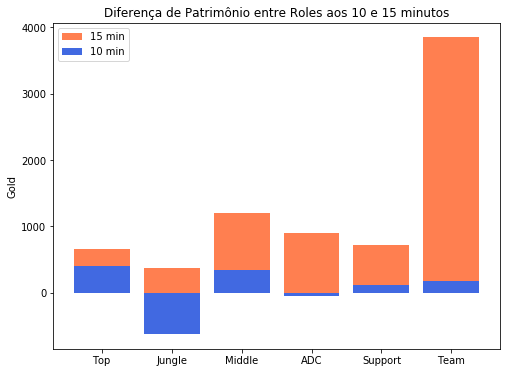

In [4]:
fnatic = game.query('team == "Fnatic"')

plt.rcParams['figure.figsize'] = (8,6)

gold = fnatic.iloc[:,np.r_[0,78]]

locations = [1, 2, 3, 4, 5, 6]
labels = ['Top', 'Jungle', 'Middle', 'ADC', 'Support', 'Team']
plt.bar(locations, gold['gdat15'], tick_label=labels, color=['coral'])

gold = fnatic.iloc[:,np.r_[0,75]]

plt.bar(locations, gold['gdat10'], tick_label=labels, color=['royalblue'])
plt.title('Diferença de Patrimônio entre Roles aos 10 e 15 minutos')
plt.ylabel('Gold')
plt.legend(['15 min', '10 min'])

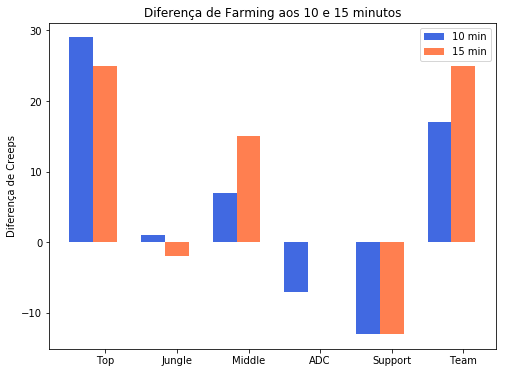

In [5]:
creeps = fnatic.iloc[:,np.r_[0,84,87]]

locations = [1, 2, 3, 4, 5, 6]
labels = ['Top', 'Jungle', 'Middle', 'ADC', 'Support', 'Team']
width = np.min(np.diff(locations))/3

fig = plt.figure()
ax = fig.add_subplot(111)

ax.bar(locations-width,creeps['csdat10'],width,color='royalblue',tick_label=labels)
ax.bar(locations,creeps['csdat15'],width,color='coral',tick_label=labels)

plt.title('Diferença de Farming aos 10 e 15 minutos')
plt.ylabel('Diferença de Creeps')
plt.legend(['10 min', '15 min'])
plt.show()

Text(0.5,1,'Relação de Dano Cousado à Inimigos')

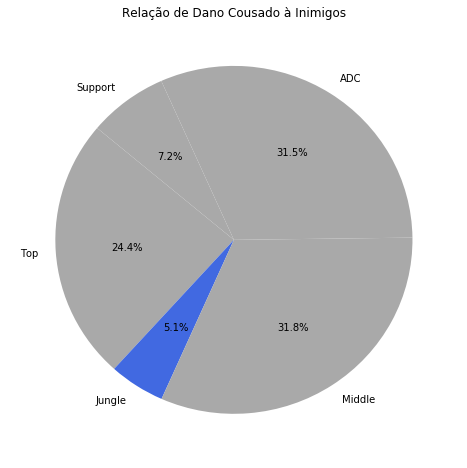

In [6]:
plt.rcParams['figure.figsize'] = (8,8)
damage = fnatic.iloc[:,np.r_[0,51]]
damage = damage.query('position != "Team"')

labels = ['Top', 'Jungle', 'Middle', 'ADC', 'Support']
colors = ['darkgray', 'royalblue', 'darkgray','darkgray','darkgray']
plt.pie(damage['dmgtochamps'], labels=labels, autopct='%1.1f%%', startangle=140, colors = colors)
plt.title('Relação de Dano Cousado à Inimigos')

([<matplotlib.patches.Wedge at 0x2064a6b9e80>,
 [Text(-1.09635,0.0894981,'Top'),
  Text(-0.692341,-0.854788,'Junlge'),
  Text(0.388144,-1.02924,'Middle'),
  Text(0.780196,0.775431,'ADC'),
  Text(-0.704462,0.844827,'Support')],
 [Text(-0.598011,0.0488171,'19.6%'),
  Text(-0.377641,-0.466248,'11.3%'),
  Text(0.211715,-0.561406,'21.9%'),
  Text(0.425562,0.422963,'41.6%'),
  Text(-0.384252,0.460815,'5.7%')])

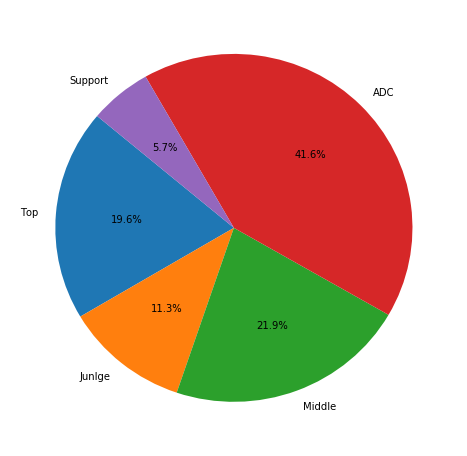

In [7]:
liquid = game.query('team == "Team Liquid"')

damage = liquid.iloc[:,np.r_[0,51]]
damage = damage.query('position != "Team"')

labels = ['Top', 'Junlge', 'Middle', 'ADC', 'Support']
plt.pie(damage['dmgtochamps'], labels=labels, autopct='%1.1f%%', startangle=140)

In [8]:
fnatic_msi = pd.read_excel('fnatic_msi.xlsx')
fnatic_msi = fnatic_msi.query('position == "Team"')
fnatic_msi

,position,player,team,champion,ban1,ban2,ban3,ban4,ban5,gamelength,...,gdat15,xpat10,oppxpat10,xpdat10,csat10,oppcsat10,csdat10,csat15,oppcsat15,csdat15
5,Team,Team,Fnatic,?,Karma,Morgana,Rakan,Shen,Lulu,36.383333,...,-1574,19143,19119,24,337,369,-32,539,602,-63
11,Team,Team,Fnatic,?,Kai'sa,Rakan,Karma,Camille,Gnar,38.900000,...,-272,19111,18374,737,339,325,14,535,494,41
17,Team,Team,Fnatic,?,Ezreal,Tahm Kench,Olaf,Sejuani,Graves,35.233333,...,2831,19557,18088,1469,333,299,34,559,500,59
23,Team,Team,Fnatic,?,Graves,Morgana,Gangplank,Ornn,Vladimir,30.483333,...,481,18477,19690,-1213,334,352,-18,556,553,3
29,Team,Team,Fnatic,?,Graves,Kai'Sa,Ornn,Kha'zix,Taliyah,41.583333,...,2479,17600,17759,-159,322,305,17,553,505,48
35,Team,Team,Fnatic,?,Kog'Maw,Kai'Sa,Vladimir,Shen,Karma,41.966667,...,2434,18788,19128,-340,297,318,-21,461,496,-35
41,Team,Team,Fnatic,?,Kha'zix,Graves,Rakan,Soraka,Janna,34.466667,...,1867,17440,18426,-986,300,301,-1,488,474,14
47,Team,Team,Fnatic,?,Morgana,Trundle,Kai'Sa,Shen,Singed,39.666667,...,-2258,19629,20086,-457,341,359,-18,549,557,-8
53,Team,Team,Fnatic,?,Tahm Kench,Rakan,Ezreal,Alistar,Skarner,34.566667,...,509,18735,18057,678,322,302,20,519,490,29
59,Team,Team,Fnatic,?,Kha'zix,Kai'Sa,Graves,Taliyah,Camille,34.966667,...,-207,18964,18332,632,325,305,20,516,494,22


In [9]:
fnc_mean = fnatic_msi.groupby(['result'], as_index = 'False')['gamelength'].mean()

fnc_mean

result
0    39.025926
1    35.416667
Name: gamelength, dtype: float64

In [10]:
fnc_count = fnatic_msi.groupby(['result'], as_index = 'False')['result'].count()
fnc_count

result
0    9
1    5
Name: result, dtype: int64

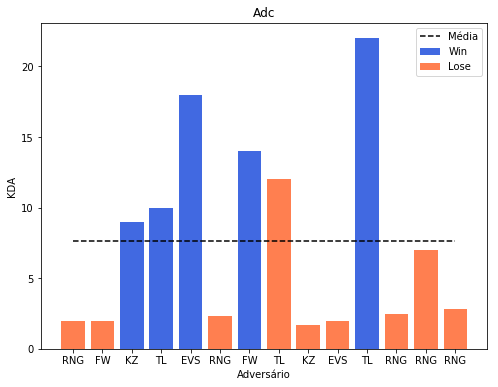

In [11]:
plt.rcParams['figure.figsize'] = (8,6)
# ADC
kda_win = [9,10,18,14,22]
kda_lose = [2,2,2.3,12,1.7,2,2.5,7,2.8]
mean = sum((kda_win + kda_lose))/len(kda_win + kda_lose)
means = []
for i in range (14):
    means.append(mean)

locations = [3, 4, 5, 7, 11]
plt.bar(locations, kda_win, color=['royalblue'])

locations = [1, 2, 6, 8, 9, 10, 12, 13, 14]
plt.bar(locations, kda_lose, color=['coral'])

locations = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]
plt.plot(locations, means, ls = '--', color = 'black')

labels = ['RNG', 'FW', 'KZ', 'TL', 'EVS', 'RNG', 'FW', 'TL', 'KZ', 'EVS', 'TL', 'RNG', 'RNG', 'RNG']
plt.xticks(locations, labels)

plt.legend(['Média', 'Win', 'Lose'])
plt.ylabel('KDA')
plt.xlabel('Adversário')
plt.title('Adc')
plt.show()

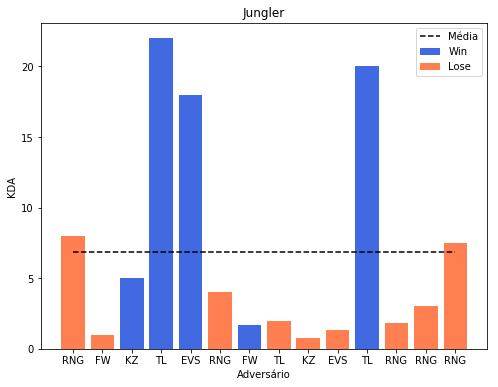

In [12]:
#Jungle
kda_win = [5,22,18,1.7,20]
kda_lose = [8,1,4,2,0.8,1.3,1.8,3,7.5]
mean = sum((kda_win + kda_lose))/len(kda_win + kda_lose)
means = []
for i in range (14):
    means.append(mean)

locations = [3, 4, 5, 7, 11]
plt.bar(locations, kda_win, color=['royalblue'])

locations = [1, 2, 6, 8, 9, 10, 12, 13, 14]
plt.bar(locations, kda_lose, color=['coral'])

locations = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]
plt.plot(locations, means, ls = '--', color = 'black')

labels = ['RNG', 'FW', 'KZ', 'TL', 'EVS', 'RNG', 'FW', 'TL', 'KZ', 'EVS', 'TL', 'RNG', 'RNG', 'RNG']
plt.xticks(locations, labels)

plt.legend(['Média', 'Win', 'Lose'])
plt.ylabel('KDA')
plt.xlabel('Adversário')
plt.title('Jungler')
plt.show()

Top-> 6.753333333333334  |  4.6753846153846155  |  2.0779487179487193
Jungle-> 10.073333333333332  |  6.475714285714286  |  3.597619047619047
Mid-> 6.382777777777778  |  4.103214285714286  |  2.2795634920634917
Adc-> 10.788888888888888  |  6.935714285714286  |  3.853174603174603
Sup-> 3.8666666666666663  |  2.485714285714286  |  1.3809523809523803


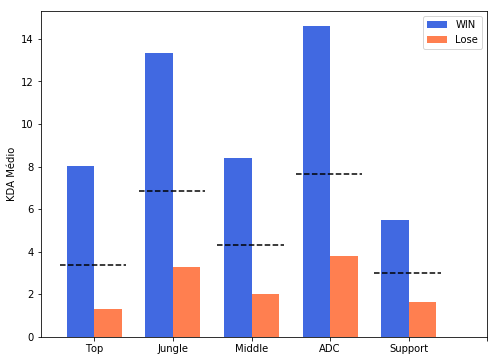

In [13]:
width = 0.35
fig = plt.figure()
ax = fig.add_subplot(111)

# TOP
kda_win = [6.5,16,7,2.7]
mean_win = sum(kda_win)/len(kda_win)
kda_lose = [1,0.4,1.7,3.5,0.17,0.5,1.6,1.2,1.6]
mean_lose = sum(kda_lose)/len(kda_lose)
mean = sum((kda_win + kda_lose))/len(kda_win + kda_lose)
print('Top->',(mean_win-mean_lose), ' | ', (mean_win-mean), ' | ', (mean-mean_lose))

ax.bar(0,mean_win,width,color='royalblue')
ax.bar(0+width,mean_lose,width,color='coral')
plt.plot([0-3/4*width,0+5/3*width], [mean,mean], ls = '--', color = 'black')

# Jungle
kda_win = [5,22,18,1.7,20]
mean_win = sum(kda_win)/len(kda_win)
kda_lose = [8,1,4,2,0.8,1.3,1.8,3,7.5]
mean_lose = sum(kda_lose)/len(kda_lose)
mean = sum((kda_win + kda_lose))/len(kda_win + kda_lose)
print('Jungle->',(mean_win-mean_lose), ' | ', (mean_win-mean), ' | ', (mean-mean_lose))

ax.bar(1,mean_win,width,color='royalblue')
ax.bar(1+width,mean_lose,width,color='coral')
plt.plot([1-3/4*width,1+5/3*width], [mean,mean], ls = '--', color = 'black')

# MID
kda_win = [14,10,10,1,7]
mean_win = sum(kda_win)/len(kda_win)
kda_lose = [2,1.25,5,1.5,0.625,0.33,2.2,2.5,2.75]
mean_lose = sum(kda_lose)/len(kda_lose)
mean = sum((kda_win + kda_lose))/len(kda_win + kda_lose)
print('Mid->',(mean_win-mean_lose), ' | ', (mean_win-mean), ' | ', (mean-mean_lose))

ax.bar(2,mean_win,width,color='royalblue')
ax.bar(2+width,mean_lose,width,color='coral')
plt.plot([2-3/4*width,2+5/3*width], [mean,mean], ls = '--', color = 'black')

# ADC
kda_win = [9,10,18,14,22]
mean_win = sum(kda_win)/len(kda_win)
kda_lose = [2,2,2.3,12,1.7,2,2.5,7,2.8]
mean_lose = sum(kda_lose)/len(kda_lose)
mean = sum((kda_win + kda_lose))/len(kda_win + kda_lose)
print('Adc->',(mean_win-mean_lose), ' | ', (mean_win-mean), ' | ', (mean-mean_lose))

ax.bar(3,mean_win,width,color='royalblue')
ax.bar(3+width,mean_lose,width,color='coral')
plt.plot([3-3/4*width,3+5/3*width], [mean,mean], ls = '--', color = 'black')

# Sup
kda_win = [5,5,10,2,5.5]
mean_win = sum(kda_win)/len(kda_win)
kda_lose = [4,1,1,1,0.8,1,1.1,1.8,3]
mean_lose = sum(kda_lose)/len(kda_lose)
mean = sum((kda_win + kda_lose))/len(kda_win + kda_lose)
print('Sup->',(mean_win-mean_lose), ' | ', (mean_win-mean), ' | ', (mean-mean_lose))

l1 = ax.bar(4,mean_win,width,color='royalblue')
l2 = ax.bar(4+width,mean_lose,width,color='coral')
l3 = plt.plot([4-3/4*width,4+5/3*width], [mean,mean], ls = '--', color = 'black')

index = np.arange(6)
ax.set_xticks(index + width / 2)
ax.set_xticklabels(('Top', 'Jungle', 'Middle', 'ADC', 'Support'))
plt.ylabel('KDA Médio')
plt.legend((l1,l2),('WIN','Lose','All'))
plt.show()

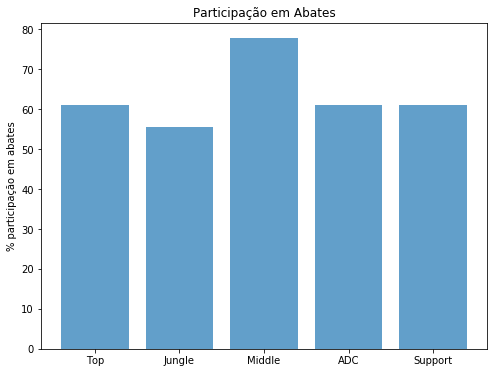

In [14]:
part = [1100/18,1000/18,1400/18,1100/18,1100/18]

locations = [1, 2, 3, 4, 5]
labels = ['Top', 'Jungle', 'Middle', 'ADC', 'Support']
plt.bar(locations, part, tick_label=labels, alpha = 0.70)
plt.ylabel('% participação em abates')
plt.title('Participação em Abates')
plt.show()

In [15]:
ft = fnatic_msi.iloc[:,np.r_[10,43,41,44,42,45,46]]

w_min = ft.query('result == 1')
print(w_min['opptowerkills'].mean())

4.0


In [16]:
dl = msi.iloc[:,np.r_[10,20,52,55,56]]

dl = dl.query('position == "Team"')
dl = dl.query('result == 1')

print(dl['opptowerkills'].mean())

2.675675675675676


In [17]:
K = 'dmgtochamps'
L = '"Middle"'
#Dsempenho K da posição L - Jogo X
x = fnatic.query('position == ' + L)
x = x[K]/x['gamelength']

#Media K da posição L - MSI
mean_msi = msi.query('position == ' + L)
mean_msi = (mean_msi['dmgtochamps']/mean_msi['gamelength']).mean()

print(K + '/minuto:\n' + L, 'no jogo X -> ', x.to_string(index=False), '\nMédia do MSI ->',mean_msi)

dmgtochamps/minuto:
"Middle" no jogo X ->  719.037282 
Média do MSI -> 465.702766839019


In [18]:
K = 'wpm'
#Desempenho K da FNC - Jogo X
x = fnatic.query('position == "Team"')
x = x[K]

#Media K - MSI
mean_msi = msi.query('position == "Team"')
#mean_msi = mean_msi.query('result == 1')
mean_msi = mean_msi[K].mean()

print(K + ':\n' + 'FNC no jogo X ->', x.to_string(index=False), '\nMédia do MSI ->',mean_msi)

wpm:
FNC no jogo X -> 3.45446 
Média do MSI -> 3.751104903122444


In [19]:
K = 'wcpm'
liquid = game.query('team == "Team Liquid"')
liquid = liquid.query('position == "Team"')

liquid = liquid[K]
print(K + ':\n' + 'TL no jogo X->', liquid.to_string(index=False))

wcpm:
TL no jogo X-> 1.047664


In [20]:
fnatic_msi.groupby(['result','ft'], as_index = 'False')['team'].count()

result  ft
0       0     6
        1     3
1       0     1
        1     4
Name: team, dtype: int64

In [21]:
oponentes = pd.read_excel('Oponentes.xlsx')

fnc_lose = oponentes.query('result == 1')
fnc_lose.groupby(['position','champion'])['url'].count()

position  champion  
ADC       Caitlyn       3
          Ezreal        1
          Jhin          1
          Kai'Sa        1
          Kog'Maw       1
          Varus         1
          Xayah         1
Jungle    Camille       1
          Graves        1
          Olaf          3
          Skarner       2
          Trundle       1
          Zac           1
Middle    Cassiopeia    1
          Galio         1
          Irelia        1
          Malzahar      1
          Ryze          3
          Vladimir      2
Support   Braum         1
          Morgana       1
          Rakan         1
          Soraka        1
          Tahm Kench    4
          Thresh        1
Team                    9
Top       Cho'gath      3
          Gangplank     1
          Gnar          1
          Ornn          3
          Vladimir      1
Name: url, dtype: int64

In [22]:
fnc_win = oponentes.query('result == 0')
fnc_win.groupby(['position','champion'])['url'].count()

position  champion  
ADC       Ezreal        1
          Kog'Maw       1
          Tristana      1
          Xayah         2
Jungle    Gragas        1
          Olaf          2
          Xin Zhao      1
          Zac           1
Middle    Azir          2
          Karma         1
          Sion          1
          Zoe           1
Support   Alistar       1
          Morgana       1
          Rakan         2
          Tahm Kench    1
Team                    5
Top       Camille       1
          Cho'gath      1
          Ornn          1
          Vladimir      2
Name: url, dtype: int64